##Computer vision libarary for pytorch
#*torchvision library for computer vision problems
'torchvision.datasets'
'torchvision.models'
'torchvision.transformas' -----> Transformaing data according to handful format for feeding the data


In [1]:
import torch
#import the neural network instance
from torch import nn
#import the vision library
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#visulization library
import matplotlib.pyplot as plt

In [2]:
##Getting the FashionMNIST Dataset ready to feed in our model
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "FashionMNIST_data",
    train = True , 
    download= True , 
    transform= torchvision.transforms.ToTensor(),
    target_transform= None
)

test_data = datasets.FashionMNIST(
    root = "FashionMNIST_data",
    train = False , 
    download= True , 
    transform= torchvision.transforms.ToTensor(),
    target_transform= None
)

In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
len(train_data.targets)

60000

In [8]:
##visualizaing our data


The shape of each image (color_channel , Height , width ) : torch.Size([1, 28, 28])


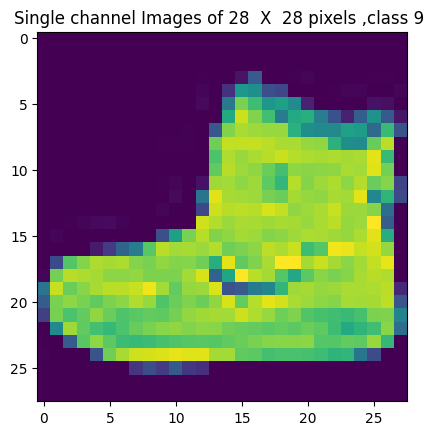

In [9]:
import matplotlib.pyplot as plt
image , label =  train_data[0]
print(f"The shape of each image (color_channel , Height , width ) : {image.shape}")
plt.imshow(image.squeeze())  #squeze method is called to eliminate the extra chanel present as the color channel to prevent shape error
plt.title(f"Single channel Images of {len(image.squeeze())}  X  {len(image.squeeze())} pixels ,class {label} ")
plt.plot()
plt.show()

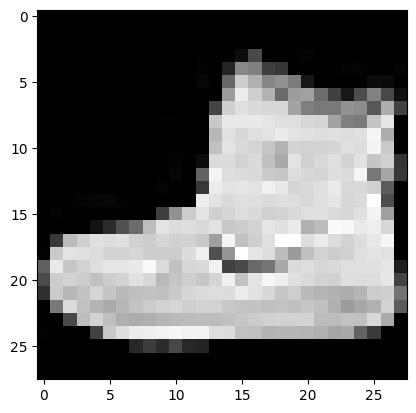

In [10]:
plt.imshow(image.squeeze() , cmap= 'gray') ;

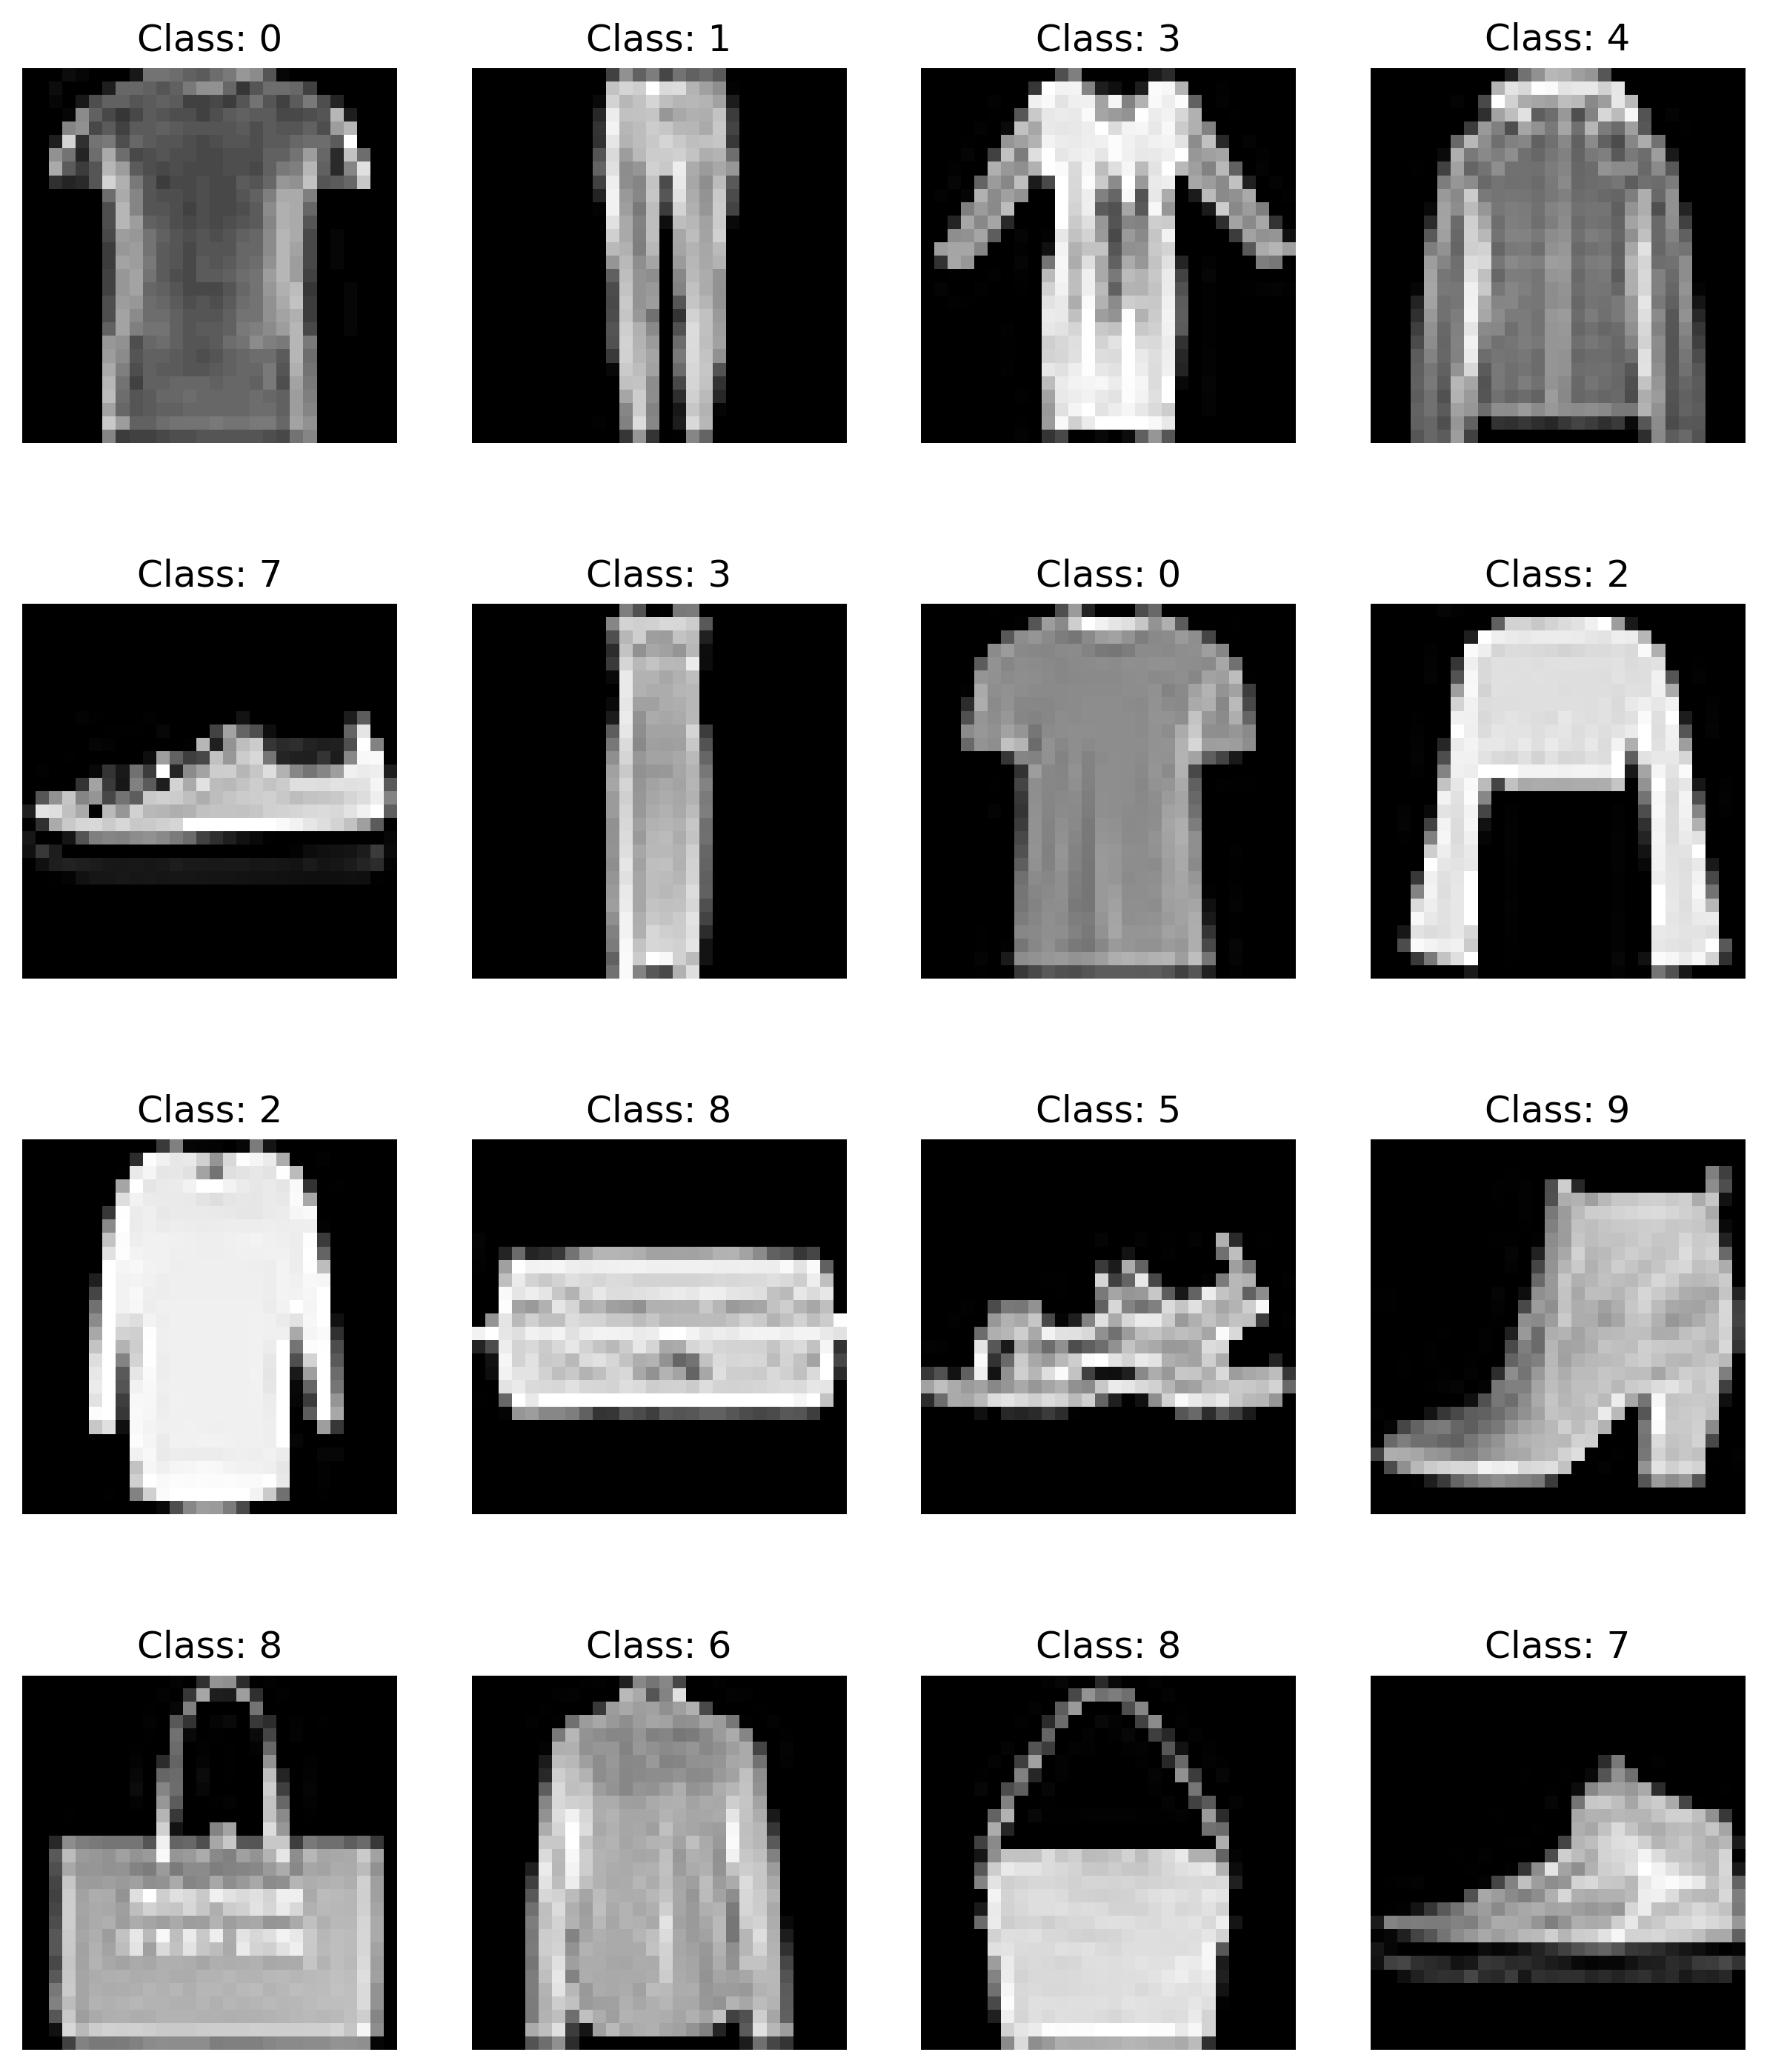

In [11]:

# Set manual seed for reproducibility
torch.manual_seed(101)

# Create a figure
fig = plt.figure(figsize=(10, 12), dpi=300)
rows, cols = 4, 4  # Define grid dimensions

# Loop to display random images
for i in range(1, rows * cols + 1):  # Corrected loop syntax
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    
    ax = fig.add_subplot(rows, cols, i)  # Use variable `ax` for subplot
    ax.imshow(image.squeeze(), cmap="gray")  # Remove extra dimension
    ax.set_title(f"Class: {label}")  # Fix title format
    ax.axis("off")  # Properly turn off axes

plt.show()  # Show the plotted images


In [12]:
from torch.utils.data import DataLoader
#define the battch size for the model
BATCH_SIZE = 32

#Turn the datasets into iterables (batches)
train_dataloader = DataLoader(dataset= train_data , 
                              batch_size=BATCH_SIZE , 
                              shuffle= True)

test_dataloader  = DataLoader(dataset= test_data ,
                              batch_size =  BATCH_SIZE , 
                              shuffle = False)

train_dataloader ,  test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2d0e35caf50>,
 <torch.utils.data.dataloader.DataLoader at 0x2d0e35cae90>)

In [13]:
len(train_dataloader)

1875

In [14]:
len(train_dataloader) / BATCH_SIZE

58.59375

In [15]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
 #Model 0 : A Baseline Model 

In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape : int , 
                 hidden_units : int , 
                 output_shape : int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten() , #first it flattens the 28x28 pixel grid to 784 dimensional tensor 
            nn.Linear(in_features=input_shape , out_features= hidden_units ), #passes throught the first activation layer
            nn.Linear(in_features= hidden_units , out_features = output_shape ) # passes throught he 2nd activation function and connects the output matrix
        )
    def forward(self ,x ) :
        return self.layer_stack(x)


In [18]:
torch.manual_seed(101)
model_0 = FashionMNISTModelV0(input_shape= 784 ,
                              hidden_units= 10 , 
                              output_shape= len(class_names)
                             ).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0216, -0.0036, -0.0292,  ..., -0.0166, -0.0342, -0.0019],
                      [ 0.0088,  0.0261,  0.0046,  ...,  0.0073,  0.0056, -0.0018],
                      [-0.0336, -0.0348, -0.0216,  ..., -0.0165,  0.0112,  0.0169],
                      ...,
                      [ 0.0022,  0.0105,  0.0171,  ..., -0.0252, -0.0354, -0.0325],
                      [-0.0040, -0.0022, -0.0179,  ...,  0.0089, -0.0104, -0.0307],
                      [ 0.0171,  0.0039,  0.0017,  ..., -0.0158,  0.0015,  0.0329]])),
             ('layer_stack.1.bias',
              tensor([-0.0329,  0.0271,  0.0073, -0.0253,  0.0012, -0.0280, -0.0194,  0.0183,
                       0.0124,  0.0090])),
             ('layer_stack.2.weight',
              tensor([[ 3.3825e-02,  2.9985e-01,  2.8862e-01,  9.9982e-02,  2.0723e-01,
                       -2.5640e-01, -3.1564e-01,  1.5375e-01, -8.9732e-02,  8.2013e-02],
                      [ 6.8721e-02, -2.4

In [20]:
###setup loss optimizer and evaluation metrix 

In [21]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [22]:
from helper_functions import accuracy_fn
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters() , 
                             lr = 0.011)



In [23]:
 ##Lets define a timer function to run our experimentations
def print_train_time(start : float ,
                     end : float , 
                     device : torch.device = None):
    """Prints the difference between the code execution."""
    total_time = end - start
    print(f"Train Time on {device} : {total_time: .3f} seconds")
    return total_time

###Creating a training loop and training as model on batches of data

1. Lopp through epochs . 
2. Loop through training batches, perform training steps , calculate the train loss(per batch)
3. Loop through testing batches , perform testing steps , calculate the test loss (per batch)
4. print out the scores / metric of evaluations
5.Time it all

In [24]:
from tqdm.auto import tqdm
import time

In [25]:
torch.manual_seed(101)
train_time_start_on_cpu =  time.time()

epochs = 3  #here we have defined the number of epochs we are training for
    
#create the training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n ------")
    ##start the training loop here
    train_loss = 0    #Initialize your training loss with zero
    for batch , (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward Pass
        y_pred = model_0(X)


        # 2 . Calculate the loss per epoch
        loss = loss_fn(y_pred , y)
        train_loss += loss

        #3 . Optimizer Zero grad 
        optimizer.zero_grad()

        # 4 . Loss Backward 
        loss.backward()

        # 5. optimizer step 
        optimizer.step()

        if batch % 400 == 0 :
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} sample.")

    ##Divide the total Train loss by the length of train dataloader
    train_loss /= len(train_dataloader)


    ###Testing Loss
    test_loss , test_acc = 0 , 0 
    model_0.eval()
    with torch.inference_mode():
        for X_test , y_test in test_dataloader:

            # 1. Forward Pass
            test_pred = model_0(X_test)

            # 2 . Calculate the loss on test data (accumulative )
            test_loss += loss_fn(test_pred , y_test)

            # 3 . calculate the accuracy

            test_acc += accuracy_fn(y_true=y_test , y_pred = test_pred.argmax(dim=1))
        #calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        #calculate the test accuracy
        test_acc /= len(test_dataloader)

    print(f"\n Train loss: {train_loss} | Test Loss : {test_loss} | , Test Accuracy : {test_acc} ")


#calculate the training time
train_time_end_on_cpu = time.time()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu ,
                                            end= train_time_end_on_cpu ,
                                            device= str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 / 60000 sample.

 Train loss: 0.8628721237182617 | Test Loss : 0.6295504570007324 | , Test Accuracy : 77.96525559105432 
Epoch : 1
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 / 60000 sample.

 Train loss: 0.5597585439682007 | Test Loss : 0.5476537346839905 | , Test Accuracy : 81.03035143769968 
Epoch : 2
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 / 60000 sample.

 Train loss: 0.5040825009346008 | Test Loss : 0.5228339433670044 | , Test Accuracy : 81.54952076677316 
Train Time on cpu :  24.224 seconds


In [26]:
##Lets train and evaluate the metric with more number of epochs

In [27]:
torch.manual_seed(101)
train_time_start_on_cpu =  time.time()

epochs = 20  #here we have defined the number of epochs we are training for

#create the training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n ------")
    ##start the training loop here
    train_loss = 0    #Initialize your training loss with zero
    for batch , (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward Pass
        y_pred = model_0(X)


        # 2 . Calculate the loss per epoch
        loss = loss_fn(y_pred , y)
        train_loss += loss

        #3 . Optimizer Zero grad 
        optimizer.zero_grad()

        # 4 . Loss Backward 
        loss.backward()

        # 5. optimizer step 
        optimizer.step()

        if batch % 400 == 0 :
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} sample.")

    ##Divide the total Train loss by the length of train dataloader
    train_loss /= len(train_dataloader)


    ###Testing Loss
    test_loss , test_acc = 0 , 0 
    model_0.eval()
    with torch.inference_mode():
        for X_test , y_test in test_dataloader:

            # 1. Forward Pass
            test_pred = model_0(X_test)

            # 2 . Calculate the loss on test data (accumulative )
            test_loss += loss_fn(test_pred , y_test)

            # 3 . calculate the accuracy

            test_acc += accuracy_fn(y_true=y_test , y_pred = test_pred.argmax(dim=1))
        #calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        #calculate the test accuracy
        test_acc /= len(test_dataloader)

    print(f"\n Train loss: {train_loss} | Test Loss : {test_loss} | , Test Accuracy : {test_acc} ")


#calculate the training time
train_time_end_on_cpu = time.time()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu ,
                                            end= train_time_end_on_cpu ,
                                            device= str(next(model_0.parameters()).device))

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch : 0
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 / 60000 sample.

 Train loss: 0.47492513060569763 | Test Loss : 0.49122920632362366 | , Test Accuracy : 82.65774760383387 
Epoch : 1
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 / 60000 sample.

 Train loss: 0.45709526538848877 | Test Loss : 0.48240622878074646 | , Test Accuracy : 83.02715654952077 
Epoch : 2
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 / 60000 sample.

 Train loss: 0.4454302191734314 | Test Loss : 0.4857122302055359 | , Test Accuracy : 82.67771565495208 
Epoch : 3
 ------
Looked at 0 / 60000 sample.
Looked at 12800 / 60000 sample.
Looked at 25600 / 60000 sample.
Looked at 38400 / 60000 sample.
Looked at 51200 /

In [28]:
###Lets make predictions and get the Model_0 results

def eval_model(model : torch.nn.Module , 
               data_loader :  torch.utils.data.DataLoader , 
               loss_fn : torch.nn.Module , #because the loss funtion , belongs to nn.CrossEntrpy class ()
               accuracy_fn ):

    '''Returns an dictionary containing the results of model predicting on data_loader'''
    loss , acc = 0 ,0 
    model.eval()   #instatntiate the evaluation mode of our model
    with torch.inference_mode():
        for X , y in tqdm(data_loader):
            #Make prediction 
            y_pred = model(X)

            #Accumumate the Loss and accuracy values per batch
            loss +=loss_fn(y_pred , y)
            acc += accuracy_fn(y_true= y , y_pred = y_pred.argmax(dim=1))

        #scale the Loss and accuracy function , to find the average loss/acc per batch
        loss/= len(data_loader)
        acc /= len(data_loader)

    return{"model_name" : model.__class__.__name__ ,
            "model_loss" : loss.item() , 
            "model_acc" : acc}

#create the model 0 results on the test dataset
model_0_results = eval_model(model= model_0 , 
                             data_loader = test_dataloader , 
                             loss_fn = loss_fn , 
                             accuracy_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.443779855966568,
 'model_acc': 84.29512779552715}

In [29]:
###Testing with Introduction to  Non-linear ReLu() activation  with our baseline model


In [30]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape : int , 
                 hidden_units : int , 
                 output_shape : int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten() , #first it flattens the 28x28 pixel grid to 784 dimensional tensor 
            nn.Linear(in_features=input_shape , out_features= hidden_units ), #passes throught the first activation layer
            nn.ReLU(),
            nn.Linear(in_features= hidden_units , out_features = output_shape ), # passes throught he 2nd activation function and connects the output matrix
            nn.ReLU()   
        )
    def forward(self ,x ) :
        return self.layer_stack(x)


In [31]:
##create an instance for model 1
torch.manual_seed(101)
device ='cpu'
model_1 = FashionMNISTModelV1(input_shape= 784 , 
                              hidden_units= 16 ,
                              output_shape= len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters() , 
                            lr = 0.13)

In [33]:
import torch
from tqdm import tqdm
from timeit import default_timer as timer

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn, 
               device: torch.device):
    """Performs a training step where the model learns from the dataloader."""
    train_loss, train_acc = 0, 0  

    # Set model to training mode
    model.train()

    # Iterate through batches
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)  # Move data to device

        # Forward Pass
        y_pred = model(X)

        # Compute Loss
        loss = loss_fn(y_pred, y)  # Use y directly (no .argmax(dim=1))
        train_loss += loss.item()

        # Compute Accuracy
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # Zero gradients
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

    # Compute average loss and accuracy
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module, 
              accuracy_fn, 
              device: torch.device):
    """Evaluates the model performance on the test dataloader."""
    test_loss, test_acc = 0, 0  

    # Set model to evaluation mode
    model.eval()

    # Disable gradient calculations
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            # Forward Pass
            test_pred = model(X)

            # Compute Loss
            loss = loss_fn(test_pred, y)  # Use y directly (no .argmax(dim=1))
            test_loss += loss.item()

            # Compute Accuracy
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

    # Compute average loss and accuracy
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

# Training Loop
torch.manual_seed(101)
train_time_start_on_cpu = timer()

# Number of epochs
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}/{epochs} \n" + "-" * 35)
    train_step(model=model_1, 
               dataloader=train_dataloader, 
               loss_fn=loss_fn, 
               accuracy_fn=accuracy_fn, 
               optimizer=optimizer, 
               device=device)
    
    test_step(model=model_1, 
              dataloader=test_dataloader, 
              loss_fn=loss_fn, 
              accuracy_fn=accuracy_fn, 
              device=device)

train_time_end_on_cpu = timer()

# Compute total training time
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch: 1/10 
-----------------------------------
Train Loss: 0.6018 | Train Accuracy: 78.47%


 10%|████████▎                                                                          | 1/10 [00:08<01:17,  8.66s/it]

Test Loss: 0.5003 | Test Accuracy: 82.02%
Epoch: 2/10 
-----------------------------------
Train Loss: 0.4522 | Train Accuracy: 83.90%


 20%|████████████████▌                                                                  | 2/10 [00:17<01:08,  8.54s/it]

Test Loss: 0.4766 | Test Accuracy: 83.61%
Epoch: 3/10 
-----------------------------------
Train Loss: 0.4225 | Train Accuracy: 84.94%


 30%|████████████████████████▉                                                          | 3/10 [00:25<00:59,  8.52s/it]

Test Loss: 0.4698 | Test Accuracy: 83.08%
Epoch: 4/10 
-----------------------------------
Train Loss: 0.4043 | Train Accuracy: 85.63%


 40%|█████████████████████████████████▏                                                 | 4/10 [00:33<00:50,  8.43s/it]

Test Loss: 0.4327 | Test Accuracy: 84.78%
Epoch: 5/10 
-----------------------------------
Train Loss: 0.3959 | Train Accuracy: 85.89%


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:42<00:42,  8.44s/it]

Test Loss: 0.4369 | Test Accuracy: 84.46%
Epoch: 6/10 
-----------------------------------
Train Loss: 0.3865 | Train Accuracy: 86.15%


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:50<00:33,  8.38s/it]

Test Loss: 0.4165 | Test Accuracy: 85.49%
Epoch: 7/10 
-----------------------------------
Train Loss: 0.3778 | Train Accuracy: 86.52%


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:59<00:25,  8.46s/it]

Test Loss: 0.4378 | Test Accuracy: 84.78%
Epoch: 8/10 
-----------------------------------
Train Loss: 0.3721 | Train Accuracy: 86.68%


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:06<00:16,  8.22s/it]

Test Loss: 0.4422 | Test Accuracy: 83.90%
Epoch: 9/10 
-----------------------------------
Train Loss: 0.3670 | Train Accuracy: 86.81%


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:14<00:08,  8.06s/it]

Test Loss: 0.4174 | Test Accuracy: 85.42%
Epoch: 10/10 
-----------------------------------
Train Loss: 0.3620 | Train Accuracy: 86.88%


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:22<00:00,  8.24s/it]

Test Loss: 0.4423 | Test Accuracy: 84.58%
Train Time on cpu :  82.362 seconds


In [34]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.443779855966568,
 'model_acc': 84.29512779552715}

In [35]:
model_1_results = eval_model(model= model_1 , data_loader= test_dataloader ,loss_fn= loss_fn , accuracy_fn= accuracy_fn) 
model_1_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 365.56it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.44226157665252686,
 'model_acc': 84.58466453674122}

In [36]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
print(image.shape)
image.shape[0]

torch.Size([1, 28, 28])


1

In [38]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [39]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [40]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [41]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [42]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(3, 3), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 31, 31])

In [43]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=1,
                         padding=1)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [44]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(3, 5), # kernel is usually a square so a tuple also works
                         stride=1,
                         padding=1)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 64, 62])

 we get another shape change.

Now our image is of shape [1, 10, 30, 30] (it will be different if you use different values) or [batch_size=1, color_channels=10, height=30, width=30].

What's going on here?

Behind the scenes, our nn.Conv2d() is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is how the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer forward() method.

If we check out our conv_layer_2.state_dict() we'll find a similar weight and bias setup as we've seen before.

In [45]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.1140,  0.1237, -0.0349,  0.1369, -0.0327],
          [ 0.0301, -0.0726,  0.0875,  0.1314, -0.1094],
          [ 0.1296,  0.0279,  0.1101,  0.0202,  0.0719]],

         [[-0.0210,  0.1149,  0.0220, -0.0696,  0.0380],
          [-0.0687, -0.0175, -0.0605,  0.0989, -0.1177],
          [-0.0687, -0.0421, -0.0896,  0.0141, -0.1472]],

         [[ 0.1346, -0.1266,  0.1151,  0.0248, -0.0484],
          [ 0.0921,  0.0232,  0.1204,  0.0163, -0.0470],
          [ 0.0401, -0.0404,  0.0627,  0.1331,  0.0862]]],


        [[[-0.0652,  0.0861,  0.0267,  0.0757, -0.0909],
          [-0.1476, -0.0576, -0.1143,  0.1223,  0.0429],
          [ 0.0617,  0.0471, -0.0026,  0.1167, -0.1059]],

         [[ 0.0094, -0.1017,  0.0460, -0.0513,  0.0457],
          [-0.0311,  0.1236, -0.0884, -0.0889, -0.0889],
          [ 0.1341,  0.0497,  0.1434, -0.1230, -0.1479]],

         [[-0.1166, -0.1003,  0.0604,  0.0534,  0.1239],
          [-0.0770, -0.1016,  0.0791, -0.0603,  0.09

In [46]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 3, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [47]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [48]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Setup a loss function and optimizer for model_2
We've stepped through the layers in our first CNN enough.

But remember, if something still isn't clear, try starting small.

Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, nn.CrossEntropyLoss() as the loss function (since we're working with multi-class classification data).

And torch.optim.SGD() as the optimizer to optimize model_2.parameters() with a learning rate of 0.1.

In [49]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [50]:
print(image.shape)
print(image.unsqueeze(0))

torch.Size([1, 28, 28])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 

In [51]:
random_image_tensor = torch.randn(size = (1,28,28))
random_image_tensor.shape


torch.Size([1, 28, 28])

In [52]:
###Training the model

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters() , 
                           lr = 0.0125)



In [53]:
##Lets start the training loop:
train_time_start_model_2 = timer()

# Train and test model 
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(dataloader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(dataloader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.9605 | Train Accuracy: 64.96%


 20%|████████████████▊                                                                   | 1/5 [00:18<01:12, 18.23s/it]

Test Loss: 0.6927 | Test Accuracy: 72.68%
Epoch: 1
---------
Train Loss: 0.5129 | Train Accuracy: 81.35%


 40%|█████████████████████████████████▌                                                  | 2/5 [00:38<00:58, 19.63s/it]

Test Loss: 0.4866 | Test Accuracy: 82.34%
Epoch: 2
---------
Train Loss: 0.4332 | Train Accuracy: 84.46%


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:58<00:39, 19.65s/it]

Test Loss: 0.4380 | Test Accuracy: 84.02%
Epoch: 3
---------
Train Loss: 0.3942 | Train Accuracy: 85.80%


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:17<00:19, 19.55s/it]

Test Loss: 0.4254 | Test Accuracy: 84.90%
Epoch: 4
---------
Train Loss: 0.3680 | Train Accuracy: 86.80%


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:37<00:00, 19.50s/it]

Test Loss: 0.3900 | Test Accuracy: 86.11%
Train Time on cpu :  97.482 seconds


In [54]:
##Model_2 resultts
model_2_results = eval_model(model = model_2 , data_loader= test_dataloader , loss_fn= loss_fn , accuracy_fn=accuracy_fn )

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 194.72it/s]


In [55]:
###comparing the results of our experiment
import pandas as pd
compare_results = pd.DataFrame([model_0_results , model_1_results , model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.443780,84.295128
1,FashionMNISTModelV1,0.442262,84.584665
2,FashionMNISTModelV2,0.390030,86.112220


Text(0, 0.5, 'Models Used for Training the Dataset')

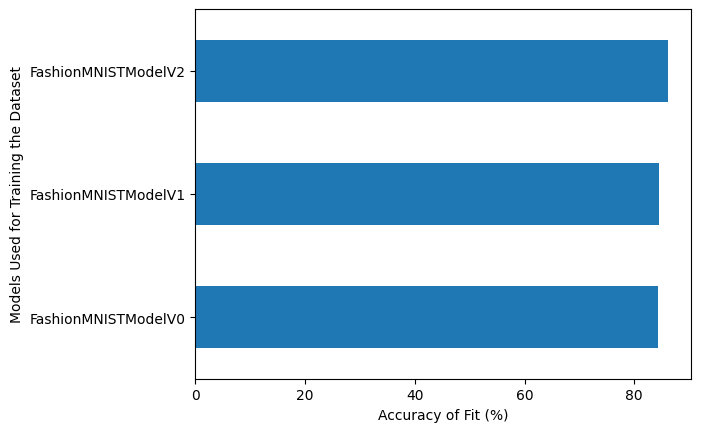

In [56]:
##visualize our model performance
compare_results.set_index("model_name")["model_acc"].plot(kind = 'barh')
plt.xlabel("Accuracy of Fit (%)")
plt.ylabel("Models Used for Training the Dataset")

In [57]:
##Make and Evaluate random prediction with our model

def make_predictions(model : torch.nn.Module ,
                     data : list ,
                     device : torch.device = device):

    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample image data (add a batch dimesnion and pass to target devide)
            sample = torch.unsqueeze(sample , dim=0 ).to(device)
            #Forward pass (model outputs raw logits)
            pred_logits = model(sample)
            #Getting the prediction probabilities
            pred_prob =  torch.softmax(pred_logits.squeeze() ,  dim = 0)
            #Get pred_probs out of the GPU for futher processing and visualization purposes
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)  

In [58]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=12):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [59]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:10]

tensor([[1.7820e-07, 6.2533e-10, 1.7690e-08, 1.0255e-08, 1.4514e-09, 9.9159e-01,
         9.3244e-07, 8.4643e-06, 7.8278e-05, 8.3196e-03],
        [3.9249e-02, 7.4561e-01, 4.1410e-03, 7.0980e-02, 7.0690e-02, 7.3627e-05,
         6.7555e-02, 6.0359e-05, 1.6374e-03, 5.9703e-06],
        [6.3540e-06, 2.5452e-08, 8.3322e-07, 1.8152e-06, 1.1394e-07, 9.0980e-04,
         1.2679e-05, 7.9929e-01, 5.9845e-03, 1.9379e-01],
        [2.6290e-03, 3.0236e-04, 2.9635e-01, 2.0087e-03, 6.9317e-01, 1.1023e-08,
         4.4548e-03, 6.9547e-09, 1.0818e-03, 4.8967e-08],
        [9.6586e-02, 8.9030e-05, 6.8405e-05, 8.9470e-01, 6.8808e-05, 9.3464e-08,
         8.3263e-03, 1.0296e-05, 1.3861e-04, 1.4041e-05],
        [7.9634e-01, 4.5572e-04, 5.5026e-04, 2.1739e-03, 2.7050e-03, 1.4649e-08,
         1.9758e-01, 4.7503e-08, 1.9694e-04, 2.2310e-08],
        [2.6067e-05, 5.6981e-05, 5.9411e-03, 1.0184e-06, 9.8660e-01, 4.1498e-08,
         5.8879e-03, 4.8018e-12, 1.4901e-03, 4.1222e-08],
        [2.1214e-05, 5.8736

In [60]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
test_labels , pred_classes


([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2],
 tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2]))

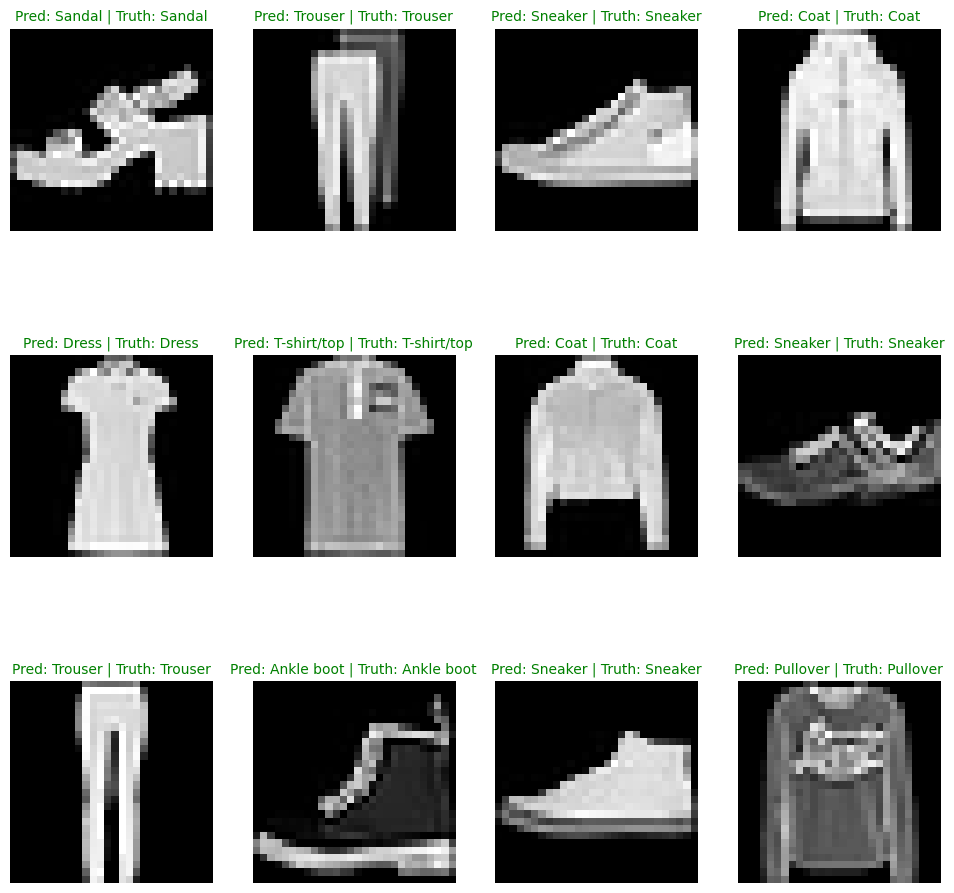

In [61]:
# Plot predictions
plt.figure(figsize=(12, 12))
nrows = 3
ncols = 4
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

Making a confusion matrix for further prediction evaluation
There are many different evaluation metrics we can use for classification problems.

One of the most visual is a confusion matrix.

A confusion matrix shows you where your classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:

Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).
Make a confusion matrix using torchmetrics.ConfusionMatrix.
Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().
Let's start by making predictions with our trained model.

In [62]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [71]:
##Additional Code block to visualize the Confusion Matrix

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [72]:

from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [73]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [74]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3900301158428192,
 'model_acc': 86.11222044728434}

In [75]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3900301158428192,
 'model_acc': 86.11222044728434}

In [76]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)